# 10. Watershed algorithm

In a number of cases, one is able to detect the positions of multiple objects on an image, but it might be difficult to segment them because they are close together or very irregular. This is where the watershed algorithm is very practical. It takes as input an image, and a series of seeds and expands each region centered around a seed as if it was filling a topographic map. The difficulties are 1. to find proper seeds, and 2. to find a natural way of creating boundaries where objects touch.

<img src="illustrations/watershed.gif" alt="" style="width: 65%"/>

The watershed algorithm is implemented in the ```morphology``` package of ```skimage```:

In [1]:
from skimage.morphology import watershed
from skimage.measure import regionprops

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.gray()
import skimage.io as io
from skimage.morphology import label

import course_functions
from course_functions import random_cmap
cmap = random_cmap()

<Figure size 432x288 with 0 Axes>

We will look again at a fluorescence microscopy image of nuclei.

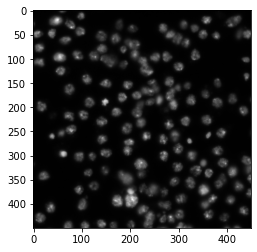

In [14]:
#load the image to process
image = io.imread('../Data/BBBC007_v1_images/A9/A9 p9d.tif')

plt.imshow(image);

## 10.1 Create labeled seeds 

We can use the code of the last chapter to produce the seeds. There we used template matching and local maxima detection to find the location of nuclei. We will now use those locations as seeds.

We compiled the code used in the previous chapter for nuclei detection into function available in the module ```course_functions```. As output we get a mask of regions to conserve and a "seed-mask", i.e. a mask with single-pixels indicating detected objects.

In [11]:
#generate template
template = course_functions.create_disk_template(10)
#generate seed map
seed_map, global_mask = course_functions.detect_nuclei_template(image, template)

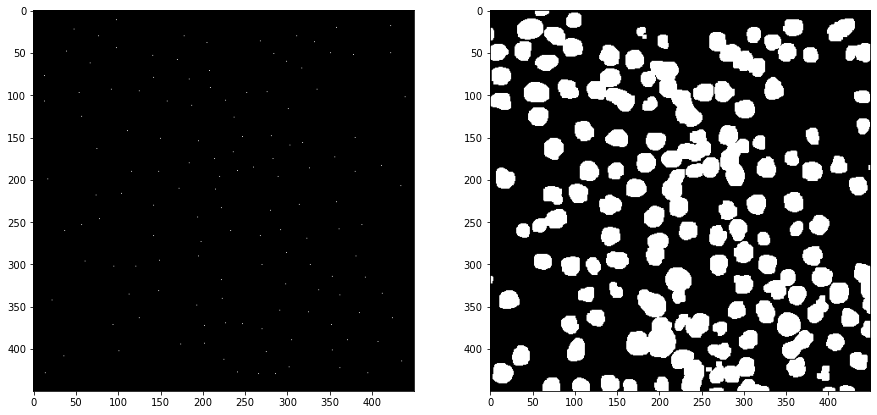

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(seed_map)
ax[1].imshow(global_mask);

We need to create a labeled image, so that the watershed algorithm creates regions with different labels:

In [15]:
seed_label = label(seed_map)

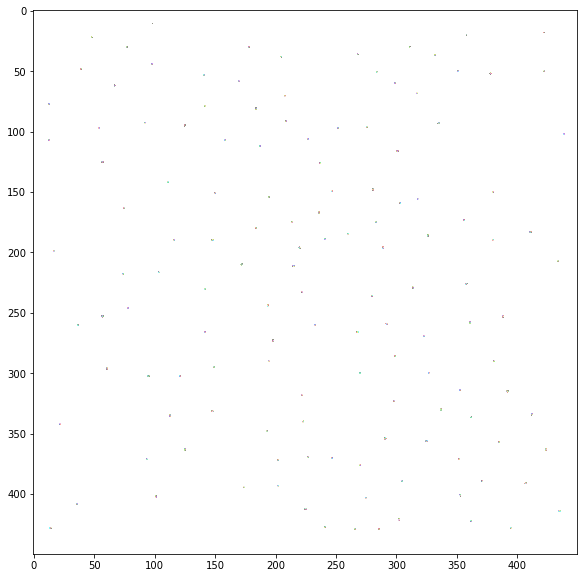

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(seed_label, cmap=cmap)

## 10.2 Running the watershed

Now we can use the image and the labeled seed map to run the watershed algorithm. However, remember the analogy of filling a topographic map: our nuclei should be "deep" regions, so we need to invert the image. Finally we also require that a thin line separates regions (```watershed_line``` option).

In [17]:
watershed_labels = watershed(image = -image, markers = seed_label, watershed_line=True)

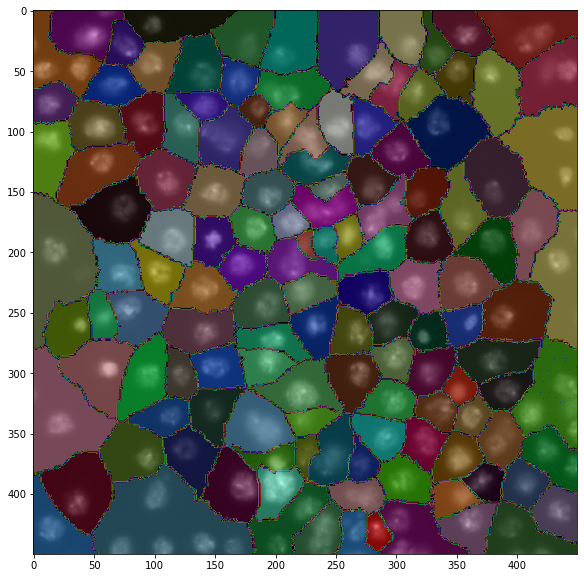

In [20]:
#create a random map 
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.imshow(watershed_labels, cmap = cmap);

The algorithm worked well and created regions around each nucleus. However, the watershed algorithm filled the entire space. As we are only interested in the true nuclei regions, we can use our global mask to keep only relevant regions. For that we can use the ```mask``` option.

In [21]:
watershed_labels = watershed(image = -image, markers = seed_label, mask = global_mask, watershed_line=True)

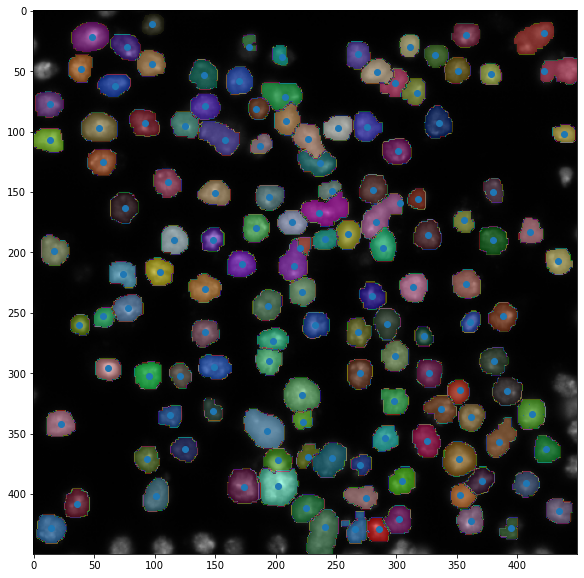

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(image)
plt.imshow(watershed_labels, cmap = cmap)
plt.plot(np.argwhere(seed_map)[:,1],np.argwhere(seed_map)[:,0],'o');

Note that one interesting option when running the watershed algorithm is the ```compactness```. This parameter will influence how "regular" and convex the segmented regions will be. We show here two examples one with low one with high compactness:

In [40]:
water_compac1 = watershed(image = -image, markers = seed_label, watershed_line=True, compactness=0)
water_compac2 = watershed(image = -image, markers = seed_label, watershed_line=True, compactness=100)

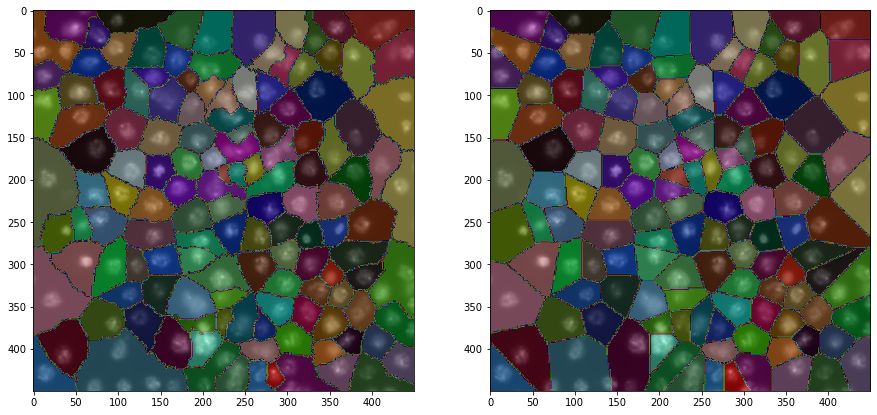

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(image)
ax[0].imshow(water_compac1, cmap=cmap)
ax[1].imshow(image)
ax[1].imshow(water_compac2, cmap=cmap);